Objectif approximer la fonction f:x->2*cos(x)+4 sur [0,10]
grâce à un percpetron multicouche(soit un réseaux de neuronnes)




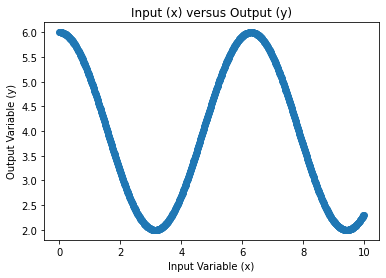

In [3]:
# example of creating a univariate dataset with a given mapping function
from matplotlib import pyplot
from numpy import cos
# define the input data
x = [i/100 for i in range(0,1000)]
# define the output data
y = [2.0*cos(i)+4 for i in x]

# plot the input versus the output
pyplot.scatter(x,y)
pyplot.title('Input (x) versus Output (y)')
pyplot.xlabel('Input Variable (x)')
pyplot.ylabel('Output Variable (y)')
pyplot.show()



La fonction à approximer correpsond donc à un signal sinusoïdale. La prédiction sera faite via le réseau de neuronnes.
L'étude du signal par un réseaux de neuronnes nécessite le formatage de notre data set x vecteurs des données en entrée et y vecteurs des données attendues en résultats afin de pouvoir calculer l'erreur d'approximation faite par le réseaux.

In [4]:
# define the dataset
import numpy as np
x = np.asarray([i/100 for i in range(0,1001)])
y = np.asarray([2.0*cos(i)+4 for i in x])
print(x.min(), x.max(), y.min(), y.max())

0.0 10.0 2.0000025365449208 6.0


Les données x et y sont reformatés sous forme de vecteurs afin d'être adapté aux algorithme d'apprentissage automatique sous python

In [5]:
import sklearn.preprocessing

## prediction sur un x_test plus grand
x_t = np.asarray([i/100 for i in range(0,1001)])
x_t=x_t.reshape((len(x_t), 1))
scale_xt = sklearn.preprocessing.MinMaxScaler()
x_t = scale_xt.fit_transform(x_t)
##

x = x.reshape((len(x), 1))
y = y.reshape((len(y), 1))
x_t=x_t.reshape(len(x_t), 1)

# separately scale the input and output variables
scale_x = sklearn.preprocessing.MinMaxScaler()
x = scale_x.fit_transform(x)
scale_y = sklearn.preprocessing.MinMaxScaler()
y = scale_y.fit_transform(y)
print(x.min(), x.max(), y.min(), y.max())

0.0 1.0 0.0 1.0


Normalisation des data input et output pour faciliter la prédiction par le réseaux de neurones

Construction du réseaux de neurones pour modéliser la fonction f.
Un perceptron c’est 3 couches de neurones : couche d’entrée, couche(s) cachée(s), couche de sortie
formule de sortie d'un neurone caché y=factivation(b+∑iwi⋅xi)
neurone de sortie sera y=∑iwi⋅xi

In [6]:
import keras
from keras.layers import Dense, Activation
# design the neural network model
##initialisation du réseaux de neuronnes vides
model = keras.Sequential()
#première couche cachée avec 10 noeuds
model.add(Dense(10, input_dim=1, activation='softplus', kernel_initializer='he_uniform'))
### fonction d'activation est une fonction mathématique appliquée à un signal en sortie d'un neurone artificiel
## Softplus activation function, softplus(x) = log(exp(x) + 1) remplacement de la fonction d'activation relu par softplus
### résultats beaucoup plus précis 
#ajout deuxièle couche cachée avec 10 noeuds
model.add(Dense(10, activation='softplus', kernel_initializer='he_uniform'))
#ajout troisième couche cachée
model.add(Dense(10, activation='softplus', kernel_initializer='he_uniform'))
# fonction d'activation softplus plus efficace que relu
#ajout 4eme
#model.add(Dense(10, activation='relu', kernel_initializer='he_uniform'))
#ajout couche de sortie
model.add(Dense(1))
##La couche de sortie (output layer) : cette couche représente le résultat final de notre réseau, sa prédiction.

Using TensorFlow backend.


Phase d’apprentissage :
 -repose intégralement sur la "descente de gradient" .
On va adapter le modèle du signal en se basant sur une erreur d'approximation MSE soit l'erreure quadratique moyenne entre les valeurs de sorties attendues et les prédections calculées par le réseaux de neuronnes. 
De plus on optimise le modèle grâce à l'optimizer 'adam' disponible dans la librairie keras. Cet optimizer permet d'effectuer un gradiant descendant qui permet de diminuer l'erreur d'approximation donc d'optimiser le modèle.


In [7]:
# define the loss function and optimization algorithm
model.compile(loss='mse', optimizer='adam')
##argument loss déterlinant le type d'erreur qu'on choisit de calculer pour déterminer la précision du modèle
##optimizer: adam optimisation algorithme ce choix d'optimizer détermine la méthode d'apprentissage et donc de réduction de l'erreur du modèle
#### cet algorithme remplace la méthode du gradiant descendant

## version alternative avec la méthode du gradiant descendant
#model.compile(loss='mse', optimizer='sgd')

# fit the model on the training dataset
model.fit(x, y, epochs=500, batch_size=10, verbose=0)

In [8]:
# make predictions for the input data
import numpy as np
#x_t=np.random.uniform(10, 30,2001)
print(len(x_t))

yhat = model.predict(x)
#print(yhat)

1001


1001


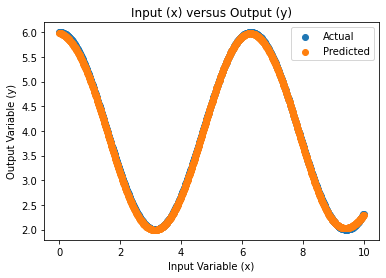

In [10]:
# inverse transforms
x_plot = scale_x.inverse_transform(x)
y_plot = scale_y.inverse_transform(y)
yhat_plot = scale_y.inverse_transform(yhat)

##
#xt_plot = scale_xt.inverse_transform(x_t)



#print(len(xt_plot))
print(len(yhat))
pyplot.scatter(x_plot,y_plot, label='Actual')
# plot x vs yhat
pyplot.scatter(x_plot,yhat_plot, label='Predicted')
# plot x vs yhat
pyplot.title('Input (x) versus Output (y)')
pyplot.xlabel('Input Variable (x)')
pyplot.ylabel('Output Variable (y)')
pyplot.legend()
pyplot.show()

In [111]:
import keras
from keras.layers import Dense, Activation

import numpy as np
# define the input data
x = [i/100 for i in range(0,1000)]
# define the output data
y = [2.0*cos(i)+4 for i in x]

xtrain = x[0:750]
ytrain = y[0:750]

xtest = x[751:1000]
ytest = y[751:1000]
model = keras.Sequential()

model.add(Dense(10, input_dim=1, activation='relu'))
model.add(Dense(10, activation='softplus', kernel_initializer='he_uniform'))
#ajout troisième couche cachée
model.add(Dense(10, activation='softplus', kernel_initializer='he_uniform'))
model.add(Dense(1))
model.summary()
sgd = keras.optimizers.Adam(lr=0.01, decay=1e-6)
model.compile(loss='mean_squared_error', 
          optimizer=sgd, 
          metrics=['mae'])

history = model.fit(xtrain, ytrain,
                batch_size=10, 
                epochs=700, 
                verbose=1, 
                validation_split=0.1)


yhat = model.predict(xtrain)
print(ytest)

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_38 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_39 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_40 (Dense)             (None, 1)                 11        
Total params: 251
Trainable params: 251
Non-trainable params: 0
_________________________________________________________________
Train on 675 samples, validate on 75 samples
Epoch 1/700
675/675 [==============================] - 0s 325us/step - loss: 6.1578 - mae: 1.9014 - val_loss: 0.2802 - val_mae: 0.4458
Epoch 2/700
675/675 [==============================] - 0s 176us/step - lo

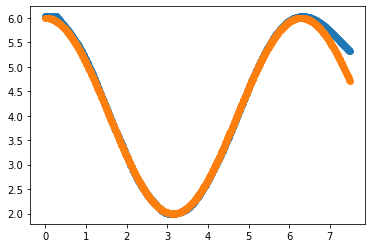

In [112]:
pyplot.scatter(xtrain,yhat, label='Predicted')
pyplot.scatter(xtrain,ytrain,label='Real')